# Kagome Model Chern Number Calculation in Momentum Space

https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.106.236802

https://arxiv.org/abs/1002.4894v1

https://arxiv.org/abs/0905.3385

https://www.worldscientific.com/doi/abs/10.1142/S021797921330017X

In [1]:
import sys
sys.path.insert(0, '../')
from Kagome_Matrix_in_k_space import *

t1= -1 L1= 0.28 t2= 0.3 L2= 0.2


\begin{equation}
\vec{a_i}.\vec{b_j}=2\pi\delta_{ij}
\end{equation}

In [2]:
# Check
np.dot(a1,b1)
np.dot(a1,b2)

0.0

In [10]:
# Discretizing Brillioun Zone
N1 = 25
N2 = 25

#Note That: Although, Following q lists provides periodic k-points conditions. 

# q1_list = np.arange(0,N1) / N1 -1/2
# q2_list =  np.arange(0,N2) / N2 -1/2

# But, This Mesh Returns True Chern Numbers for Well-Defined Berry Curvature
q1_list = np.arange(0,N1) / N1 
q2_list =  np.arange(0,N2) / N2 

# Allowed k Pairs
Q = np.zeros([N1,N2,2])
for iq1, q1 in enumerate(q1_list):
    for iq2, q2 in enumerate(q2_list):
        Q[iq1,iq2,:] = q1*b1+q2*b2

In [11]:
# Eigenvalues and Eigenenergies of Matrix
q = 3 # Dimension of Matrix = 3
EEA=np.empty([N1,N2,q])
UUA=np.empty([N1,N2,q,q],dtype=complex)
for iq1, q1 in enumerate(q1_list):
    for iq2, q2 in enumerate(q2_list):
        kx,ky=q1*b1+q2*b2
        k1=np.dot([kx,ky],a1_b);k2=np.dot([kx,ky],a2_b);k3=k2-k1 # Convention
        EEA[iq1,iq2,:],UUA[iq1,iq2,:,:] = np.linalg.eigh(Hamiltonian(k1,k2,k3))

In [12]:
# For 2D DFT
kx = Q[:,:,0].flatten()
ky = Q[:,:,1].flatten()

In [13]:
%matplotlib inline

Text(0, 0.5, '$E$')

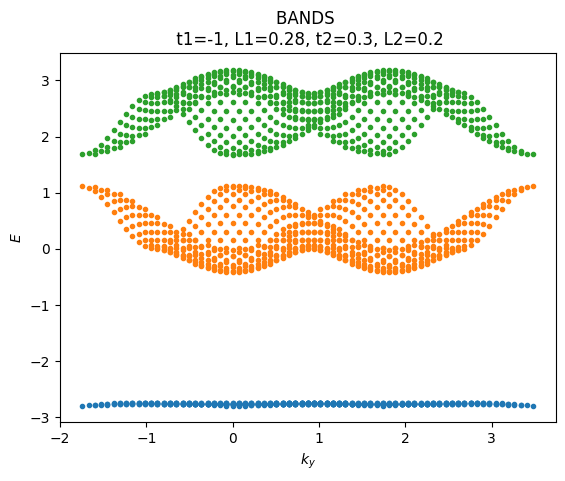

In [14]:
import matplotlib.pyplot as plt

# Plot Energy Bands
fig1 = plt.figure()
ax1 = plt.axes()
for i in range(3):
    ax1.plot(ky,EEA[:,:,i].flatten(),'.')
plt.title("BANDS \n t1="+str(t1)+", L1="+str(L1)+", t2="+str(t2)+", L2="+str(L2))
plt.xlabel(r'$k_y$')
plt.ylabel(r'$E$')

Text(0.5, 0, '$E$')

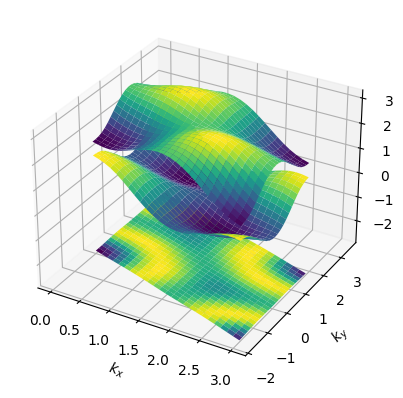

In [15]:
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')
for i in range(3):
    ax2.plot_surface(Q[:,:,0], Q[:,:,1], EEA[:,:,i],cmap='viridis')
ax2.set_xlabel(r'$k_x$')
ax2.set_ylabel(r'$k_y$')
ax2.set_zlabel(r'$E$')
# This Process of BZ Mesh Leads wrong Band Structure, It doesn't get along with outputs of review article

In [16]:
for bi in range(q): 
    # Caculate The Link Variables
    bj = bi # Band index  
    U1=np.zeros([N1,N2],dtype=complex)
    U2=np.zeros([N1,N2],dtype=complex)
    print("---------------")
    for iq1, q1 in enumerate(q1_list): 
        for iq2, q2 in enumerate(q2_list): 
            s1=np.dot(np.conj(UUA[iq1,iq2,:,bi]),UUA[np.mod(iq1+1,N1),iq2,:,bj]) 
#             print("S1=",s1)
            s2=np.dot(np.conj(UUA[iq1,iq2,:,bj]),UUA[iq1,np.mod(iq2+1,N2),:,bi]) 
#             print("S2=",s2)
            U1[iq1,iq2]=s1/np.abs(s1)
#             print("U1=",U1)
            U2[iq1,iq2]=s2/np.abs(s2)
#             print("U2=",U2)

    # Calculate The Field Strength
    F12=np.zeros([N1,N2],dtype=complex) 
    for iq1, q1 in enumerate(q1_list):
        for iq2, q2 in enumerate(q2_list):
            F12[iq1,iq2] = U1[iq1,iq2]*U2[np.mod(iq1+1,N1),iq2]/(U1[iq1,np.mod(iq2+1,N2)]*U2[iq1,iq2])
            F12[iq1,iq2] = np.log(F12[iq1,iq2])

    # Alternative Field Strength Calculation 
#     F12=np.log( U1*np.roll(U2,-1,axis=0)*np.conj(np.roll(U1,-1,axis=1)*U2) )
#     print("F12=",F12)
    
    # Chern Number of Band Index
    print("Band Index:",bi)
    print(F12.sum()/(2j*np.pi))
    print("-----------")

---------------
Band Index: 0
(-1.0000000000000002+1.1446973101437002e-16j)
-----------
---------------
Band Index: 1
(3.533949646070574e-17-5.847253542311251e-16j)
-----------
---------------
Band Index: 2
(1-5.684431827376007e-16j)
-----------
